### Bibliotecas

In [188]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

import scienceplots
plt.style.use('science')

### Lendo Dados

In [189]:
vars = [
    'DT',
    'NPHI',
    'RES',
    'RHOB',
]
paths = []
for v in vars:
    paths.append(os.path.join(os.getcwd(),'Outputs', f'DECOMP_{v}_FILT.pkl'))
    paths.append(os.path.join(os.getcwd(),'Outputs', f'FEATDEC_{v}_FILT.pkl'))
paths

['c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_DT_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_NPHI_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RES_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\DECOMP_RHOB_FILT.pkl',
 'c:\\Users\\bewm\\OneDrive - PETROBRAS\\Documents\\2_Projetos\\Mestrado\\SYSID_well_logs\\Outputs\\FEATDEC_RHOB_FILT.pkl']

In [190]:
dfs=pd.DataFrame()
for p in paths:
    dfs = pd.concat([dfs,pd.read_pickle(p)], axis=0)
dfs

,MODEL,R2_TR,R2_TE,MAE_TR,MAE_TE,MODEL_OBJ,IN,OUT,RMSE_TR,RMSE_TE
0,SVM.MLP,0.844872,0.847915,0.065208,0.061507,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085181,0.071883
1,SVM.PolyReg,0.843652,0.846300,0.065080,0.061619,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.085515,0.072264
2,SVM.LinReg,0.846253,0.844257,0.064814,0.062311,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.084801,0.072742
3,SVM.XGBoost,0.860108,0.843387,0.061999,0.062693,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.080890,0.072945
4,SVM.ExtraTrees,0.860460,0.842629,0.061393,0.062784,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,0.080788,0.073121
...,...,...,...,...,...,...,...,...,...,...
19,AdaBoostRegressor,0.889069,0.643324,0.051402,0.071803,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.059845,0.088468
20,XGBoost(DEC),0.984780,0.640055,0.016553,0.070281,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.022167,0.088872
21,AdaBoostRegressor(DEC),0.870081,0.583292,0.055865,0.080798,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.064764,0.095623
22,DecisionTree,0.960471,0.554287,0.026371,0.065496,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,0.035724,0.098895


In [191]:
df_results = dfs.sort_values('R2_TE', ascending=False).reset_index(drop=True)

In [192]:
def model_class(row):
    if 'DEC' in row['MODEL']:
        model_class = 'FEAT_DEC'
    elif '.' in row['MODEL']:
        model_class = 'ENSEMBLE'
    else:
        model_class = 'BASE'
    return model_class
def base_model(row):
    if 'DEC' in row['MODEL']:
        base_model = row['MODEL'].split('(')[0]
    elif '.' in row['MODEL']:
        base_model = row['MODEL'].split('.')[0]
    else:
        base_model = row['MODEL']
    return base_model

In [193]:
df_results['CASE'] = df_results.apply(model_class, axis=1)
df_results['BASE_MODEL'] = df_results.apply(base_model, axis=1)
df_results['BASE_MODEL'].value_counts()

BASE_MODEL
PolyReg              60
MLP                  60
SVM                  60
AdaBoostRegressor    60
ExtraTrees           60
LinReg               60
XGBoost              60
RandomForest         60
KNN                  60
DecisionTree         60
GradientBoosting     60
BaggingRegressor     60
Name: count, dtype: int64

In [194]:
df_results.columns

Index(['MODEL', 'R2_TR', 'R2_TE', 'MAE_TR', 'MAE_TE', 'MODEL_OBJ', 'IN', 'OUT',
       'RMSE_TR', 'RMSE_TE', 'CASE', 'BASE_MODEL'],
      dtype='object')

Removendo duplicatas do caso base que ficou repetido

In [195]:
df_results['CASE'].value_counts()

CASE
ENSEMBLE    576
BASE         96
FEAT_DEC     48
Name: count, dtype: int64

In [196]:
df_results = df_results.drop_duplicates(subset=['MODEL','IN', 'OUT','CASE'])
df_results['CASE'].value_counts()

CASE
ENSEMBLE    576
FEAT_DEC     48
BASE         48
Name: count, dtype: int64

Reordering columns

In [197]:
new_cols = [
    'CASE',
    'MODEL',
    'BASE_MODEL',
    'R2_TR',
    'R2_TE',
    'RMSE_TR',
    'RMSE_TE',
    # 'MAE_TR',
    # 'MAE_TE',
    'MODEL_OBJ',
    'IN',
    'OUT',
]
df_results = df_results[new_cols]
df_results

,CASE,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
1,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,ENSEMBLE,SVM.MLP,SVM,0.844872,0.847915,0.085181,0.071883,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
3,ENSEMBLE,MLP.LinReg,MLP,0.926596,0.846713,0.048681,0.057996,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,ENSEMBLE,SVM.PolyReg,SVM,0.843652,0.846300,0.085515,0.072264,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
...,...,...,...,...,...,...,...,...,...,...
715,ENSEMBLE,DecisionTree.DecisionTree,DecisionTree,-7.469267,-8.289256,0.629392,0.561788,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT
716,ENSEMBLE,MLP.MLP,MLP,-10.671665,-8.518276,0.551379,0.475135,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
717,ENSEMBLE,PolyReg.PolyReg,PolyReg,-13.231549,-8.717386,0.608849,0.480079,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
718,ENSEMBLE,PolyReg.PolyReg,PolyReg,-47.859033,-37.150219,1.511718,1.138493,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


Sumarização por classe

In [198]:
df_sum_class = df_results.drop_duplicates(subset=['CASE', 'OUT'])
df_sum_class = df_sum_class.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_class

,CASE,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


Sumarização por modelo

In [199]:
df_sum_model = df_results.drop_duplicates(subset=['BASE_MODEL', 'OUT'])
df_sum_model = df_sum_model.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True)
df_sum_model

,CASE,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,BASE,ExtraTrees,ExtraTrees,0.950228,0.798039,0.040086,0.066570,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,BASE,KNN,KNN,1.000000,0.794791,0.000000,0.067103,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
5,ENSEMBLE,XGBoost.MLP,XGBoost,0.937864,0.794570,0.044789,0.067140,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
6,ENSEMBLE,LinReg.AdaBoostRegressor,LinReg,0.875863,0.786024,0.063306,0.068522,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
7,BASE,GradientBoosting,GradientBoosting,0.988800,0.760834,0.019015,0.072443,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
8,BASE,RandomForest,RandomForest,0.975829,0.736613,0.027935,0.076023,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
9,FEAT_DEC,BaggingRegressor(DEC),BaggingRegressor,0.993417,0.710367,0.014579,0.079721,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB


### Plotando

In [200]:
dfbest = df_results.sort_values(['OUT','R2_TE'], ascending=False).reset_index(drop=True).groupby('OUT')
dfbest = dfbest.head(12)
dfbest

,CASE,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,ENSEMBLE,MLP.LinReg,MLP,0.926596,0.846713,0.048681,0.057996,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,ENSEMBLE,MLP.AdaBoostRegressor,MLP,0.938606,0.845082,0.044521,0.058304,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,ENSEMBLE,MLP.KNN,MLP,0.986865,0.844464,0.020592,0.058420,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
4,ENSEMBLE,MLP.PolyReg,MLP,0.929074,0.844309,0.047852,0.058449,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
5,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
6,ENSEMBLE,MLP.SVM,MLP,0.923000,0.843502,0.049859,0.058601,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
7,ENSEMBLE,MLP.BaggingRegressor,MLP,0.977553,0.842988,0.026920,0.058697,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
8,ENSEMBLE,MLP.RandomForest,MLP,0.968292,0.841304,0.031995,0.059011,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
9,ENSEMBLE,MLP.ExtraTrees,MLP,0.940498,0.839384,0.043829,0.059366,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB


In [292]:
myPalette = ['r', '0.3', '#4169E1']

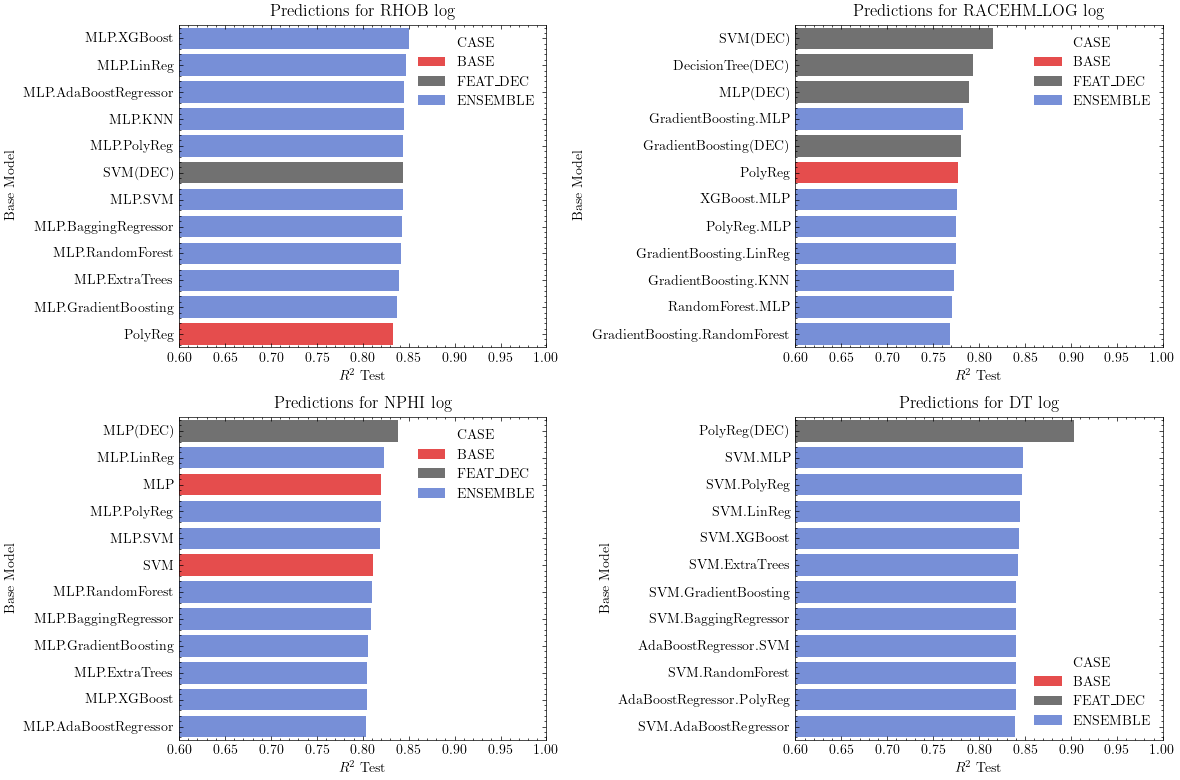

In [293]:
lim=(0.6,1)
figsize = (12,8)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

# fig.suptitle('')

for i, var in enumerate(dfbest['OUT'].unique()):
    sns.barplot(data=dfbest[dfbest['OUT']==var], x='R2_TE', y='MODEL', hue='CASE', ax=ax[i], hue_order=dfbest['CASE'].unique()[::-1], palette=myPalette, alpha=0.8);
    ax[i].set_title(f' Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Base Model')
    # ax[i].legend().remove()
    # if i==3: ax[i].legend()
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_model.pdf', format='pdf')

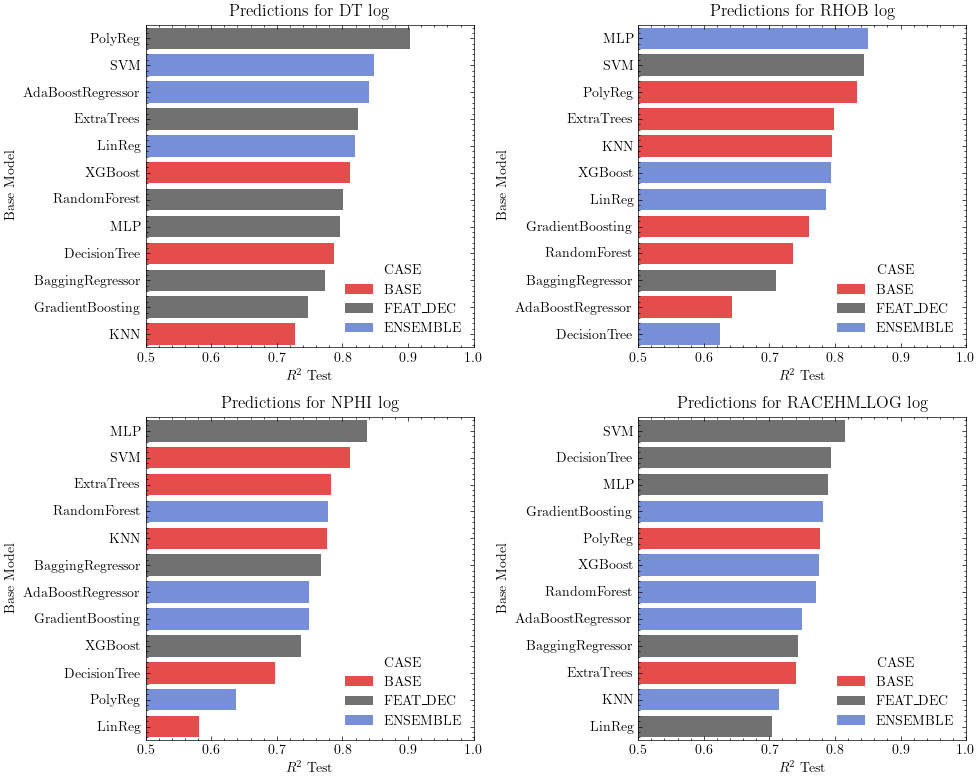

In [294]:
lim=(0.5,1)
figsize = (10,8)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

# fig.suptitle('')

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=df_sum_model[df_sum_model['OUT']==var], x='R2_TE', y='BASE_MODEL', hue='CASE', ax=ax[i], hue_order=dfbest['CASE'].unique()[::-1], palette=myPalette, alpha=0.8);
    ax[i].set_title(f' Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Base Model')
    # ax[i].legend().remove()
    # if i==3: ax[i].legend()
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_base_model.pdf', format='pdf')

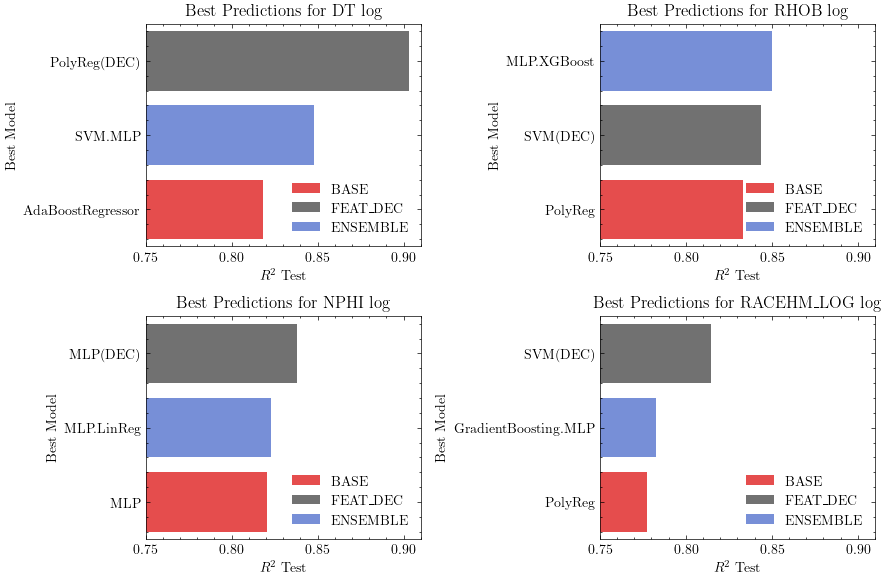

In [295]:
lim=(0.75,0.91)
figsize = (9,6)

fig, ax = plt.subplots(2, 2, figsize=figsize)
ax = ax.flat

for i, var in enumerate(df_results['OUT'].unique()):
    sns.barplot(data=df_sum_class[df_sum_class['OUT']==var], x='R2_TE', y='MODEL', hue='CASE', ax=ax[i], palette=myPalette, hue_order=dfbest['CASE'].unique()[::-1], alpha=0.8);
    ax[i].set_title(f'Best Predictions for {var} log')
    ax[i].set_xlabel('$R^2$ Test')
    ax[i].set_ylabel('Best Model')
    ax[i].legend(loc='lower right')
    # if i==3: ax[i].legend(loc='lower right')
    ax[i].set_xlim(lim)
    plt.tight_layout()

fig.savefig(f'./Images/bars_best.pdf', format='pdf')

Predições dos melhores casos

In [236]:
df = pd.read_csv('./Data/volve_preproc.csv')
df.shape

(23733, 10)

In [237]:
def decomp(X_te, period=10):
    extrapolate_trend = 5
    return seasonal_decompose(X_te, period=period, extrapolate_trend=extrapolate_trend)

In [238]:
df_results['OUT'].unique().tolist()

['DT', 'RHOB', 'NPHI', 'RACEHM_LOG']

In [239]:
data_dict = {
    'DT' :  [],
    'RHOB': [],
    'NPHI': [],
    'RACEHM_LOG': [],
}

# DT
n=3
df2 = df[::n]
df_filt = df2.dropna()
test_wells = ['15/9-F-1 B']
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['GR','NPHI','RHOB','PHIF','RACEHM_LOG']
output = ['DT']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['DT'].append(X_te)
data_dict['DT'].append(X_te_dec)
data_dict['DT'].append(X2_te)
data_dict['DT'].append(y_te)
data_dict['DT'].append(test_df['MD'])

# NPHI
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['CALI','DT','GR','RHOB','PHIF','RACEHM_LOG']
output = ['NPHI']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['NPHI'].append(X_te)
data_dict['NPHI'].append(X_te_dec)
data_dict['NPHI'].append(X2_te)
data_dict['NPHI'].append(y_te)
data_dict['NPHI'].append(test_df['MD'])


# RACEHM_LOG
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['DT','GR','NPHI','RHOB','SW']
output = ['RACEHM_LOG']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['RACEHM_LOG'].append(X_te)
data_dict['RACEHM_LOG'].append(X_te_dec)
data_dict['RACEHM_LOG'].append(X2_te)
data_dict['RACEHM_LOG'].append(y_te)
data_dict['RACEHM_LOG'].append(test_df['MD'])

# RHOB
n=4
df2 = df[::n]
df_filt = df2.dropna()
test_df = df_filt[df_filt['wellName'].isin(test_wells)]
inputs = ['DT','GR','NPHI','SW','RACEHM_LOG']
output = ['RHOB']
X_te = test_df[inputs]
y_te = test_df[output]
X_te = X_te.values
y_te = y_te.values
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_te = X_scaler.fit_transform(X_te)
y_te = y_scaler.fit_transform(y_te)
X_te_dec = decomp(X_te,period=10)
X2_te = np.concatenate([X_te_dec.trend,X_te_dec.seasonal+X_te_dec.resid], axis=1)

data_dict['RHOB'].append(X_te)
data_dict['RHOB'].append(X_te_dec)
data_dict['RHOB'].append(X2_te)
data_dict['RHOB'].append(y_te)
data_dict['RHOB'].append(test_df['MD'])

PLots

In [240]:
df_sum_class

,CASE,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT


In [241]:
def y_pred(row):
    if row['CASE'] == 'ENSEMBLE':
        y_pred = row['MODEL_OBJ'][0].predict(data_dict[row['OUT']][1].trend) + row['MODEL_OBJ'][1].predict(data_dict[row['OUT']][1].seasonal+data_dict[row['OUT']][1].resid)
    elif row['CASE'] == 'FEAT_DEC':
        y_pred = row['MODEL_OBJ'].predict(data_dict[row['OUT']][2])
    else:
        y_pred = row['MODEL_OBJ'].predict(data_dict[row['OUT']][0])
    return y_pred

def y_test(row):
    return data_dict[row['OUT']][3]

In [242]:
df_sum_class['y_pred'] = df_sum_class.apply(y_pred, axis=1)
df_sum_class['y_test'] = df_sum_class.apply(y_test, axis=1)

df_sum_class

,CASE,MODEL,BASE_MODEL,R2_TR,R2_TE,RMSE_TR,RMSE_TE,MODEL_OBJ,IN,OUT,y_pred,y_test
0,ENSEMBLE,MLP.XGBoost,MLP,0.959644,0.850101,0.036095,0.057332,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,"[0.45771955376311224, 0.447360316085328, 0.449...","[[0.44560972888541794], [0.42920897021086635],..."
1,FEAT_DEC,SVM(DEC),SVM,0.916052,0.843549,0.052060,0.058592,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,"[0.3819200679936834, 0.35854672653354025, 0.34...","[[0.44560972888541794], [0.42920897021086635],..."
2,BASE,PolyReg,PolyReg,0.909091,0.833406,0.054175,0.060461,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.SW.RACEHM_LOG,RHOB,"[[0.4337494027583047], [0.4271859918268128], [...","[[0.44560972888541794], [0.42920897021086635],..."
3,FEAT_DEC,SVM(DEC),SVM,0.910283,0.814786,0.048342,0.066279,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG,"[0.4255004286955377, 0.4220703834277182, 0.425...","[[0.3104570041814525], [0.304873375846967], [0..."
4,ENSEMBLE,GradientBoosting.MLP,GradientBoosting,0.966459,0.782489,0.029558,0.071825,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG,"[0.37224155599697734, 0.3706919867554916, 0.36...","[[0.3104570041814525], [0.304873375846967], [0..."
5,BASE,PolyReg,PolyReg,0.897169,0.777609,0.051754,0.072627,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,DT.GR.NPHI.RHOB.SW,RACEHM_LOG,"[0.3489823267756298, 0.33662157471122267, 0.33...","[[0.3104570041814525], [0.304873375846967], [0..."
6,FEAT_DEC,MLP(DEC),MLP,0.875294,0.838061,0.049795,0.053468,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5857069930542625, 0.5996601968801513, 0.605...","[[0.4659057652911911], [0.4840503365525314], [..."
7,ENSEMBLE,MLP.LinReg,MLP,0.858956,0.822695,0.052957,0.055947,(RandomizedSearchCV(cv=RepeatedKFold(n_repeats...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5192783283561934, 0.5445151645568689, 0.567...","[[0.4659057652911911], [0.4840503365525314], [..."
8,BASE,MLP,MLP,0.843075,0.820392,0.055858,0.056309,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,CALI.DT.GR.RHOB.PHIF.RACEHM_LOG,NPHI,"[0.5896119541744501, 0.6125950780993932, 0.623...","[[0.4659057652911911], [0.4840503365525314], [..."
9,FEAT_DEC,PolyReg(DEC),PolyReg,0.846082,0.903419,0.084848,0.057283,RandomizedSearchCV(cv=RepeatedKFold(n_repeats=...,GR.NPHI.RHOB.PHIF.RACEHM_LOG,DT,"[[0.6008521766614161], [0.6233392866595034], [...","[[0.7435146946794435], [0.7929273084479367], [..."


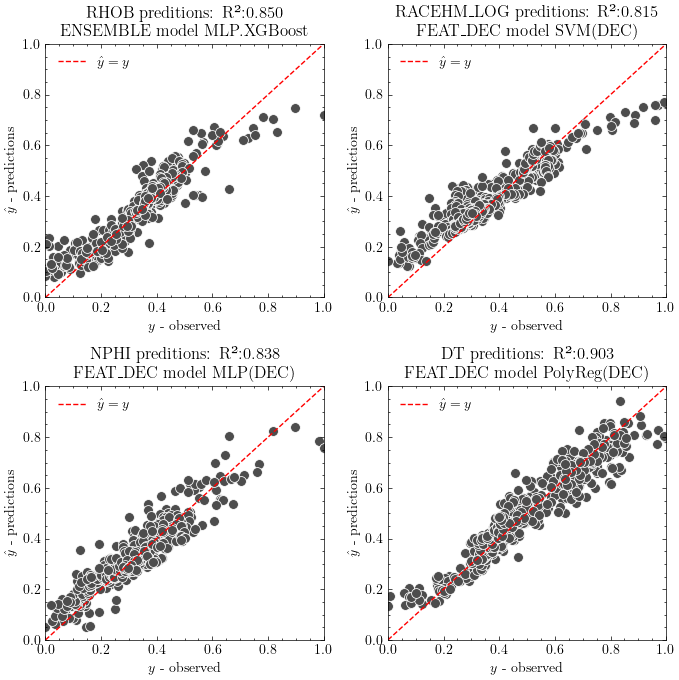

In [244]:
lim=(0,1)

fig, ax = plt.subplots(2,2, figsize=(7,7))

plt.subplot(221)
sns.scatterplot(x=df_sum_class.iloc[0,-1].ravel(), y=df_sum_class.iloc[0,-2].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[0,'OUT']} preditions: R²:{df_sum_class.loc[0,'R2_TE']:.3f}\n {df_sum_class.loc[0,'CASE']} model {df_sum_class.loc[0,'MODEL']}")
plt.tight_layout()

plt.subplot(222)
sns.scatterplot(x=df_sum_class.iloc[3,-1].ravel(), y=df_sum_class.iloc[3,-2].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[3,'OUT']} preditions: R²:{df_sum_class.loc[3,'R2_TE']:.3f}\n {df_sum_class.loc[3,'CASE']} model {df_sum_class.loc[3,'MODEL']}")
plt.tight_layout()

plt.subplot(223)
sns.scatterplot(x=df_sum_class.iloc[6,-1].ravel(), y=df_sum_class.iloc[6,-2].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[6,'OUT']} preditions: R²:{df_sum_class.loc[6,'R2_TE']:.3f}\n {df_sum_class.loc[6,'CASE']} model {df_sum_class.loc[6,'MODEL']}")
plt.tight_layout()

plt.subplot(224)
sns.scatterplot(x=df_sum_class.iloc[9,-1].ravel(), y=df_sum_class.iloc[9,-2].ravel(), s=50, color='.3')
plt.plot(lim, lim, 'r--', label='$\hat{y}=y$')
plt.xlim(lim)
plt.ylim(lim)
plt.xlabel('$y$ - observed')
plt.ylabel('$\hat{y}$ - predictions')
plt.legend(loc='upper left')
plt.title(f"{df_sum_class.loc[9,'OUT']} preditions: R²:{df_sum_class.loc[9,'R2_TE']:.3f}\n {df_sum_class.loc[9,'CASE']} model {df_sum_class.loc[9,'MODEL']}")
plt.tight_layout()

pass;
fig.savefig(f'./Images/crossplot_science.pdf', format='pdf')


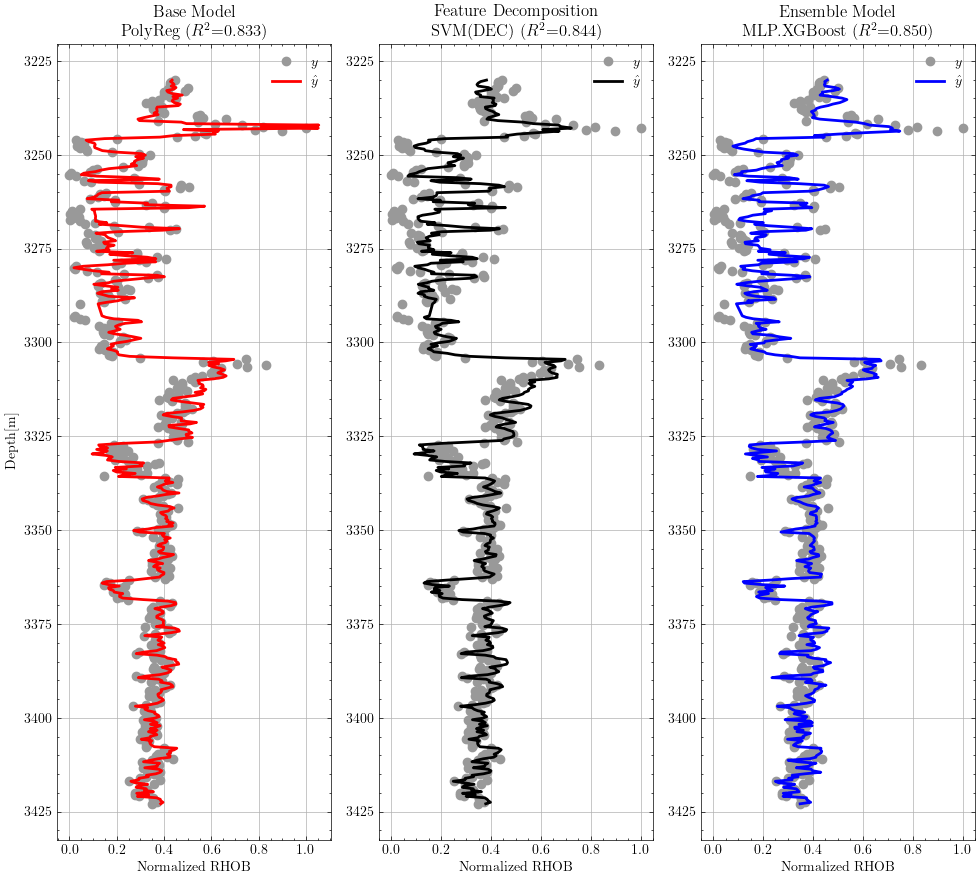

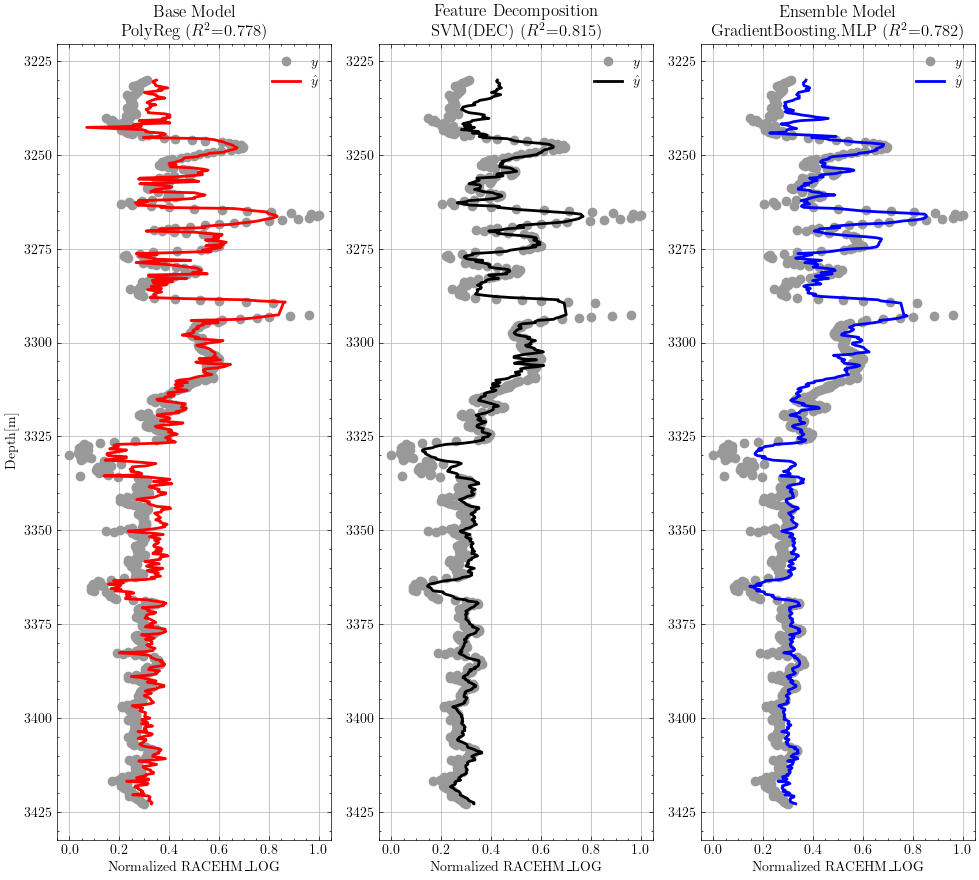

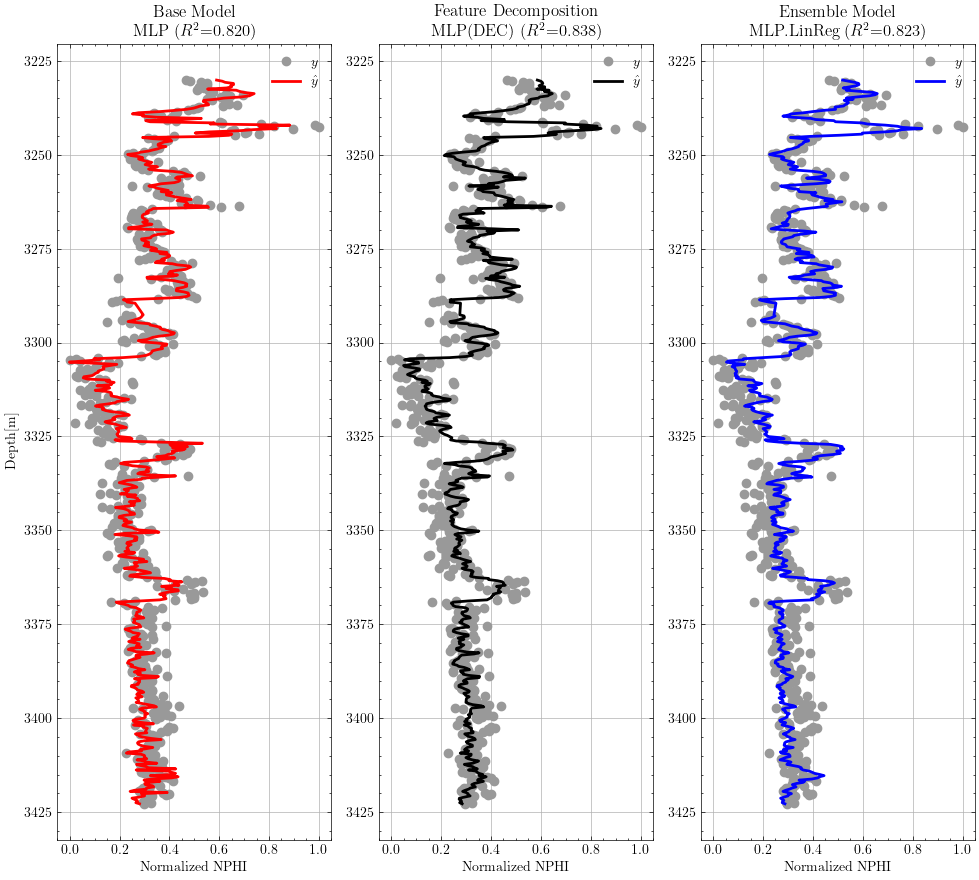

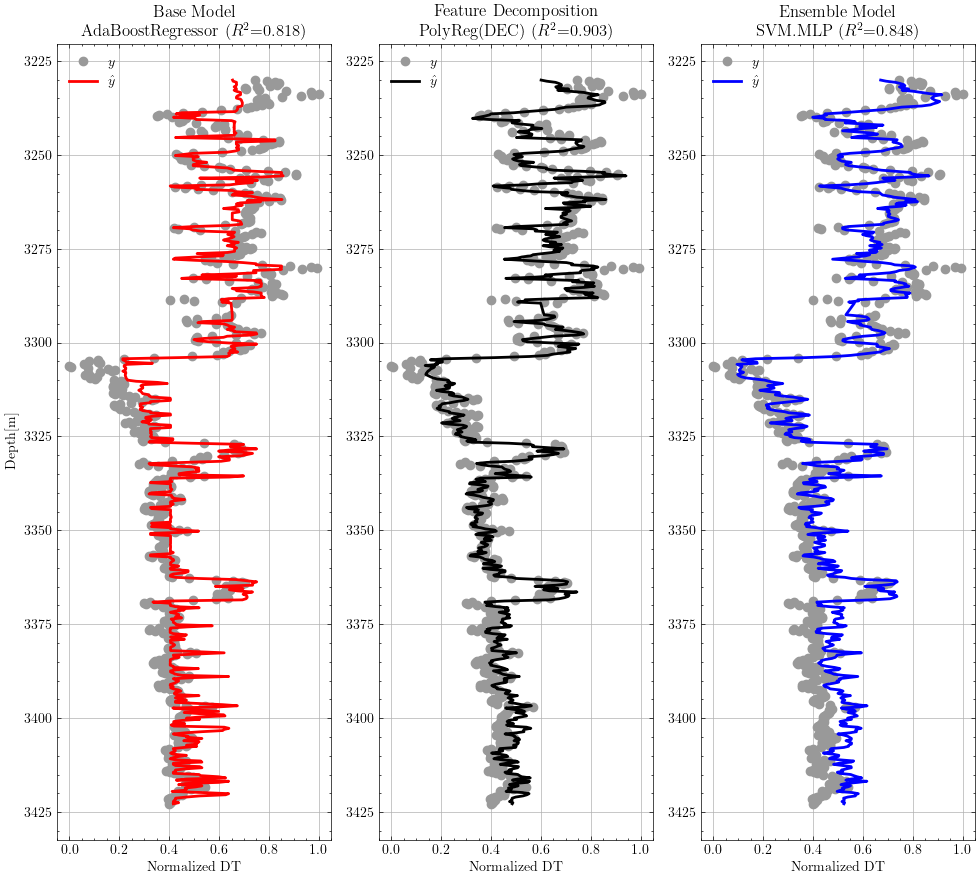

In [253]:
for variable in df_sum_class['OUT'].unique():
    dftemp = df_sum_class[df_sum_class['OUT'] == variable]
    dftemp = dftemp.sort_values(['CASE']).reset_index(drop=True)

    base_row = dftemp.loc[0,:]
    featdec_row = dftemp.loc[2,:]
    ensemble_row = dftemp.loc[1,:]

    y_hat_base = base_row['MODEL_OBJ'].predict(data_dict[variable][0])
    y_hat_featdec = featdec_row['MODEL_OBJ'].predict(data_dict[variable][2])
    y_hat_hybrid = ensemble_row['MODEL_OBJ'][0].predict(data_dict[variable][1].trend) + ensemble_row['MODEL_OBJ'][1].predict(data_dict[variable][1].seasonal+data_dict[variable][1].resid)

    fig, ax = plt.subplots(1,3, figsize=(10,9))

    plt.subplot(131)
    plt.plot(data_dict[variable][-2], data_dict[variable][-1], 'o', color='#999999', label='$y$');
    plt.plot(y_hat_base, data_dict[variable][-1], 'r', lw=2, label='$\hat{y}$')
    plt.title(f'Base Model \n {base_row["MODEL"]} ($R^2$={r2_score(data_dict[variable][-2], y_hat_base):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylabel('Depth[m]')
    plt.legend(loc='best')
    plt.tight_layout()

    plt.subplot(132)
    plt.plot(data_dict[variable][-2], data_dict[variable][-1], 'o', color='#999999', label='$y$');
    plt.plot(y_hat_featdec, data_dict[variable][-1], 'k', lw=2, label='$\hat{y}$')
    plt.gca().invert_yaxis()
    plt.title(f'Feature Decomposition \n {featdec_row["MODEL"]} ($R^2$={r2_score(data_dict[variable][-2], y_hat_featdec):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()

    plt.subplot(133)
    plt.plot(data_dict[variable][-2], data_dict[variable][-1], 'o', color='#999999', label='$y$');
    plt.plot(y_hat_hybrid,  data_dict[variable][-1], 'b', lw=2, label='$\hat{y}$')
    plt.gca().invert_yaxis()
    plt.title(f'Ensemble Model \n {ensemble_row["MODEL"]} ($R^2$={r2_score(data_dict[variable][-2], y_hat_hybrid):.3f})')
    plt.xlabel(f'Normalized {variable}')
    plt.grid()
    plt.legend(loc='best')
    plt.tight_layout()

    fig.savefig(f'./Images/pred_{variable}_science.pdf', format='pdf')